- https://data.winnipeg.ca/Recreation/Pool-Facility-Usage/j4s8-s9ap
    
    

In [1]:
#!pip install sodapy

# Datasets

In [2]:
import pandas as pd
from sodapy import Socrata

- neighbourhood
- mosquitoes
- bikes

## neighbourhoods

In [3]:
import shapely.geometry
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
neighbourhoods_id = "xaux-29zr"
neighbourhoods = client.get(neighbourhoods_id, limit=2000)
neighbourhoods = GeoDataFrame(neighbourhoods)
newgeom = [shapely.geometry.Polygon(x['coordinates'][0][0]) for x in neighbourhoods.the_geom]
neighbourhoods['newgeom'] = newgeom
neighbourhoods = neighbourhoods.set_geometry('newgeom')
neighbourhoods.head()


,id,name,the_geom,newgeom
0,696,Seven Oaks,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.11021888431701 49.925633193803, ..."
1,178,Parker,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.17615035641499 49.850537882086, ..."
2,630,The Maples,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.163398354858 49.941591371416, -9..."
3,702,Luxton,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.116047777972 49.920325228662, -9..."
4,1012,Talbot-Grey,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.101068054847 49.904738664792, -9..."


In [4]:
neighbourhoods.plot()

## bikes

In [5]:
client = Socrata("data.winnipeg.ca", None)
bikes = client.get("9t9k-ya8b", limit=10000)
bikes = pd.DataFrame(bikes)
bikes.head(3).T

,0,1,2
asset_class,STAND-ALONE PLAY COMPONENT,SEATING,SEATING
asset_id,46292,47525,24478
asset_size,N/A,N/A,N/A
asset_type,N/A,BENCH,BENCH
geom_type,POINT,POINT,POINT
park_id,1137,266,1179
park_name,Frontenac Park,Muriel Street Park,Aberdeen Adventure Playground
prim_field,N/A,N/A,N/A
the_geom,"{'type': 'Point', 'coordinates': [-97.08174796...","{'type': 'Point', 'coordinates': [-97.29729904...","{'type': 'Point', 'coordinates': [-97.12915711..."


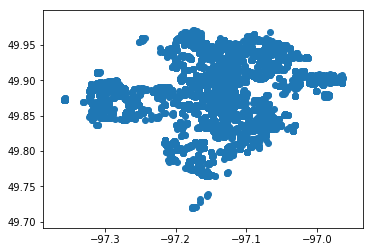

In [6]:
from shapely.geometry import Point

newgeom = [Point(x['coordinates']) for x in bikes.the_geom]
bikes['newgeom'] = newgeom
bikes = bikes.set_geometry('newgeom')
bikes.plot()

## bugs

In [7]:
import pandas as pd
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
bugs = client.get("du7c-8488", limit=2000)
bugs = GeoDataFrame(bugs)

# wrangling
idvars = ['count_date', 'trap_days']
location_only = [x for x in bugs.columns if "average" not in x]
location_only = [x for x in location_only if x not in idvars]
print(f"number of locations {len(location_only)}")

# make wide to long 
bugs = pd.melt(bugs[location_only + idvars], id_vars = idvars, var_name = 'location', value_name = 'bugcount')
bugs = GeoDataFrame(bugs)
bugs.head()

number of locations 37


,count_date,trap_days,location,bugcount
0,2015-05-04T00:00:00,3,north_east_1,0
1,2015-05-06T00:00:00,2,north_east_1,2
2,2015-05-08T00:00:00,2,north_east_1,0
3,2015-05-11T00:00:00,3,north_east_1,0
4,2015-05-13T00:00:00,2,north_east_1,1


buglocations2gps = \
{"north_east_1": {"coord": [49.951867, -97.059306]}
,"north_east_2": {"coord": [49.933941, -97.096341]}
,"north_east_3": {"coord": [49.924809, -97.056330]}
,"north_east_4": {"coord": [49.906175, -97.094797]}
,"north_east_5": {"coord": [49.892358, -97.022426]}
,"north_east_6": {"coord": [49.918257, -97.043848]}
,"north_east_7": {"coord": [49.904900, -96.981602]}
,"north_west_1": {"coord": [49.890104, -97.308464]}
,"north_west_2": {"coord": [49.882624, -97.238131]}
,"north_west_3": {"coord": [49.888943, -97.193254]}
,"north_west_4": {"coord": [49.920877, -97.202540]}
,"north_west_5": {"coord": [49.931627, -97.170450]}
,"north_west_6": {"coord": [49.975104, -97.147863]}
,"north_west_7": {"coord": [49.948876, -97.126311]}
,"rural_aa": {"coord": [49.981128, -97.244987]}
,"rural_bb": {"coord": [49.999793, -97.194880]}
,"rural_cc": {"coord": [49.991068, -97.089770]}
,"rural_dd": {"coord": [49.990523, -97.013920]}
,"rural_ee": {"coord": [49.852485, -96.986202]}
,"rural_ff": {"coord": [49.800355, -97.073122]}
,"rural_gg": {"coord": [49.782835, -97.339871]}
,"rural_hh": {"coord": [49.854707, -97.338403]}
,"rural_ii": {"coord": [49.890188, -97.341707]}
,"south_east_1": {"coord": [49.52426, 97.07156]}
,"south_east_2": {"coord": [49.856801, -97.109705]}
,"south_east_3": {"coord": [49.859405, -97.066774]}
,"south_east_4": {"coord": [49.824369, -97.133797]}
,"south_east_5": {"coord": [49.829048, -97.098352]}
,"south_east_6": {"coord": [49.827414, -97.060787]}
,"south_east_7": {"coord": [49.806356, -97.100467]}
,"south_west_1": {"coord": [49.832983, -97.332547]}
,"south_west_2": {"coord": [49.852445, -97.275173]}
,"south_west_3": {"coord": [49.868974, -97.243095]}
,"south_west_4": {"coord": [49.868834, -97.184476]}
,"south_west_5": {"coord": [49.818122, -97.165982]}
 }

In [8]:
buglocations2gps = \
{"north_east_1": {"coord": [49.951867, -97.059306]}
,"north_east_2": {"coord": [49.933941, -97.096341]}
,"north_east_3": {"coord": [49.924809, -97.056330]}
,"north_east_4": {"coord": [49.906175, -97.094797]}
,"north_east_5": {"coord": [49.892358, -97.022426]}
,"north_east_6": {"coord": [49.918257, -97.043848]}
,"north_east_7": {"coord": [49.904900, -96.981602]}
,"north_west_1": {"coord": [49.890104, -97.308464]}
,"north_west_2": {"coord": [49.882624, -97.238131]}
,"north_west_3": {"coord": [49.888943, -97.193254]}
,"north_west_4": {"coord": [49.920877, -97.202540]}
,"north_west_5": {"coord": [49.931627, -97.170450]}
,"north_west_6": {"coord": [49.975104, -97.147863]}
,"north_west_7": {"coord": [49.948876, -97.126311]}
,"rural_aa": {"coord": [49.981128, -97.244987]}
,"rural_bb": {"coord": [49.999793, -97.194880]}
,"rural_cc": {"coord": [49.991068, -97.089770]}
,"rural_dd": {"coord": [49.990523, -97.013920]}
,"rural_ee": {"coord": [49.852485, -96.986202]}
,"rural_ff": {"coord": [49.800355, -97.073122]}
,"rural_gg": {"coord": [49.782835, -97.339871]}
,"rural_hh": {"coord": [49.854707, -97.338403]}
,"rural_ii": {"coord": [49.890188, -97.341707]}
,"south_east_1": {"coord": [49.52426, -97.07156]}
,"south_east_2": {"coord": [49.856801, -97.109705]}
,"south_east_3": {"coord": [49.859405, -97.066774]}
,"south_east_4": {"coord": [49.824369, -97.133797]}
,"south_east_5": {"coord": [49.829048, -97.098352]}
,"south_east_6": {"coord": [49.827414, -97.060787]}
,"south_east_7": {"coord": [49.806356, -97.100467]}
,"south_west_1": {"coord": [49.832983, -97.332547]}
,"south_west_2": {"coord": [49.852445, -97.275173]}
,"south_west_3": {"coord": [49.868974, -97.243095]}
,"south_west_4": {"coord": [49.868834, -97.184476]}
,"south_west_5": {"coord": [49.818122, -97.165982]}
,"south_west_6": {"coord": [49.805538, -97.138229]}
,"south_west_7": {"coord": [49.827168, -97.170704]}
 }

In [9]:
temp = bugs.location.map(buglocations2gps)
newgeom = [shapely.geometry.Point(x['coord'][1], x['coord'][0]) for x in temp]
bugs = GeoDataFrame(bugs)
bugs['newgeom'] = newgeom
bugs = bugs.set_geometry('newgeom')
bugs.head()

,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
1,2015-05-06T00:00:00,2,north_east_1,2,POINT (-97.05930600000001 49.951867)
2,2015-05-08T00:00:00,2,north_east_1,0,POINT (-97.05930600000001 49.951867)
3,2015-05-11T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
4,2015-05-13T00:00:00,2,north_east_1,1,POINT (-97.05930600000001 49.951867)


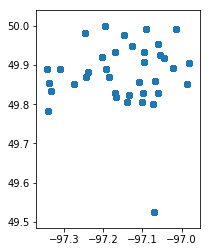

In [10]:
bugs.plot()

In [11]:
subset = bugs[bugs.count_date == bugs.count_date[0]]

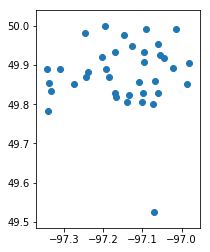

In [12]:
subset.plot()

# merge

In [16]:
!pip install fol ium

  Could not find a version that satisfies the requirement fol (from versions: )
No matching distribution found for fol


In [19]:
import folium

In [39]:
gps = [x['coord'] for x in buglocations2gps.values()]
gps[0]

[49.951867, -97.059306]

In [ ]:
folium.Map()

In [41]:
folium.Map(gps[0], zoom_start=11)

# other stuff

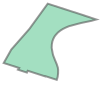

In [47]:
neighbourhoods.newgeom[0]

In [51]:
testhood = neighbourhoods.newgeom[0]
testhood.intersects(bugs.newgeom[0])

False

In [62]:
bugs.location.unique()

array(['north_east_1', 'north_east_2', 'north_east_3', 'north_east_4',
       'north_east_5', 'north_east_6', 'north_east_7', 'north_west_1',
       'north_west_2', 'north_west_3', 'north_west_4', 'north_west_5',
       'north_west_6', 'north_west_7', 'rural_aa', 'rural_bb', 'rural_cc',
       'rural_dd', 'rural_ee', 'rural_ff', 'rural_gg', 'rural_hh',
       'rural_ii', 'south_east_1', 'south_east_2', 'south_east_3',
       'south_east_4', 'south_east_5', 'south_east_6', 'south_east_7',
       'south_west_1', 'south_west_2', 'south_west_3', 'south_west_4',
       'south_west_5', 'south_west_6', 'south_west_7'], dtype=object)

In [68]:
bugsubset = bugs[bugs.count_date == bugs.count_date[0]]
print(bugsubset.shape)
bugsubset.head()

(37, 5)


,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
249,2015-05-04T00:00:00,3,north_east_2,2,POINT (-97.096341 49.933941)
498,2015-05-04T00:00:00,3,north_east_3,2,POINT (-97.05633 49.924809)
747,2015-05-04T00:00:00,3,north_east_4,0,POINT (-97.094797 49.906175)
996,2015-05-04T00:00:00,3,north_east_5,3,POINT (-97.022426 49.892358)


In [77]:
bugloc = bugsubset[['location','newgeom']].set_index('location')
bugloc.head()

,newgeom
location,
north_east_1,POINT (-97.05930600000001 49.951867)
north_east_2,POINT (-97.096341 49.933941)
north_east_3,POINT (-97.05633 49.924809)
north_east_4,POINT (-97.094797 49.906175)
north_east_5,POINT (-97.022426 49.892358)


In [96]:
df = neighbourhoods.set_index('id')
df.head()

,name,the_geom,newgeom
id,,,
696,Seven Oaks,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.11021888431701 49.925633193803, ..."
178,Parker,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.17615035641499 49.850537882086, ..."
630,The Maples,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.163398354858 49.941591371416, -9..."
702,Luxton,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.116047777972 49.920325228662, -9..."
1012,Talbot-Grey,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.101068054847 49.904738664792, -9..."


In [182]:
hood = df.to_dict(orient='record')
result = {}
for datum in hood:
    name, the_geom, newgeom = datum.values()
    hoodloc = the_geom['coordinates']
    hoodgeom = shapely.geometry.Polygon(hoodloc[0][0])
    dump = {k:v for k,v in bugloc.to_dict()['newgeom'].items() if hoodgeom.intersects(v)}
    #distance = GeoSeries.distance
    if dump != {}:
        result[name] = dump


In [183]:
hood = df.to_dict(orient='record')
result = {}
for datum in hood:
    name, the_geom, newgeom = datum.values()
    hoodloc = the_geom['coordinates']
    hoodgeom = shapely.geometry.Polygon(hoodloc[0][0])
    dump = {k:v for k,v in bugloc.to_dict()['newgeom'].items() if hoodgeom.intersects(v)}
    #distance = GeoSeries.distance
    if dump != {}:
        result[name] = dump


In [186]:
len(bugloc)

37

In [206]:
hoodgeom_series = GeoSeries([hoodgeom for x in range(0, len(bugloc))])
hoodgeom_series.head()

0    POLYGON ((-97.071008132814 49.929370604903, -9...
1    POLYGON ((-97.071008132814 49.929370604903, -9...
2    POLYGON ((-97.071008132814 49.929370604903, -9...
3    POLYGON ((-97.071008132814 49.929370604903, -9...
4    POLYGON ((-97.071008132814 49.929370604903, -9...
dtype: object

In [207]:
hoodgeom_series.shape

(37,)

In [211]:
bugloc_series = bugloc['newgeom']
bugloc_series.head()


location
north_east_1    POINT (-97.05930600000001 49.951867)
north_east_2            POINT (-97.096341 49.933941)
north_east_3             POINT (-97.05633 49.924809)
north_east_4            POINT (-97.094797 49.906175)
north_east_5            POINT (-97.022426 49.892358)
Name: newgeom, dtype: object

In [212]:
constanhoodgeom_series = GeoSeries([hoodgeom for x in range(0, len(bugloc))], index = bugloc_series.index)
hoodgeom_series.head()

location
north_east_1    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_2    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_3    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_4    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_5    POLYGON ((-97.071008132814 49.929370604903, -9...
dtype: object

In [209]:
bugloc_series.shape

(37,)

In [210]:
GeoSeries.distance(bugloc_series, hoodgeom_series)

north_east_1   NaN
north_east_2   NaN
north_east_3   NaN
north_east_4   NaN
north_east_5   NaN
north_east_6   NaN
north_east_7   NaN
north_west_1   NaN
north_west_2   NaN
north_west_3   NaN
north_west_4   NaN
north_west_5   NaN
north_west_6   NaN
north_west_7   NaN
rural_aa       NaN
rural_bb       NaN
rural_cc       NaN
rural_dd       NaN
rural_ee       NaN
rural_ff       NaN
rural_gg       NaN
rural_hh       NaN
rural_ii       NaN
south_east_1   NaN
south_east_2   NaN
south_east_3   NaN
south_east_4   NaN
south_east_5   NaN
south_east_6   NaN
south_east_7   NaN
                ..
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28          

In [181]:
GeoSeries.distance(bugs.newgeom, neighbourhoods.newgeom)

0       0.043155
1       0.134963
2       0.100383
3       0.057274
4       0.050027
5       0.067987
6       0.125571
7       0.111837
8       0.194437
9       0.025912
10      0.083309
11      0.090592
12      0.111136
13      0.056674
14      0.072437
15      0.079613
16      0.063291
17      0.162240
18      0.092837
19      0.209310
20      0.039239
21      0.106377
22      0.047638
23      0.247477
24      0.049767
25      0.037765
26      0.066041
27      0.167527
28      0.025783
29      0.095835
          ...   
9183         NaN
9184         NaN
9185         NaN
9186         NaN
9187         NaN
9188         NaN
9189         NaN
9190         NaN
9191         NaN
9192         NaN
9193         NaN
9194         NaN
9195         NaN
9196         NaN
9197         NaN
9198         NaN
9199         NaN
9200         NaN
9201         NaN
9202         NaN
9203         NaN
9204         NaN
9205         NaN
9206         NaN
9207         NaN
9208         NaN
9209         NaN
9210         N

In [157]:
GeoSeries.distance

<function geopandas.base.GeoPandasBase.distance>

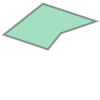

In [158]:
hoodgeom

In [170]:
bugeom = bugloc.to_dict()['newgeom']['north_east_1']

In [172]:
print(bugeom)

POINT (-97.05930600000001 49.951867)


In [173]:
print(hoodgeom)

POLYGON ((-97.071008132814 49.929370604903, -97.06197803790199 49.926365512212, -97.059358366453 49.929646470629, -97.052099365226 49.932114247383, -97.052329448663 49.932190856964, -97.062644119052 49.935595491879, -97.062798686409 49.93564650044, -97.062989585604 49.935709869484, -97.063080098318 49.935638243655, -97.071008132814 49.929370604903))


In [175]:
GeoSeries.distance( hoodgeom, bugeom)

AttributeError: 'Polygon' object has no attribute 'geometry'

In [150]:
bugloc.to_dict()['newgeom']

{'north_east_1': <shapely.geometry.point.Point at 0x7f17746235c0>,
 'north_east_2': <shapely.geometry.point.Point at 0x7f1774946be0>,
 'north_east_3': <shapely.geometry.point.Point at 0x7f177484c358>,
 'north_east_4': <shapely.geometry.point.Point at 0x7f1774788a90>,
 'north_east_5': <shapely.geometry.point.Point at 0x7f177466e208>,
 'north_east_6': <shapely.geometry.point.Point at 0x7f177469f940>,
 'north_east_7': <shapely.geometry.point.Point at 0x7f17746150b8>,
 'north_west_1': <shapely.geometry.point.Point at 0x7f17745447f0>,
 'north_west_2': <shapely.geometry.point.Point at 0x7f1774466f28>,
 'north_west_3': <shapely.geometry.point.Point at 0x7f17743e86a0>,
 'north_west_4': <shapely.geometry.point.Point at 0x7f177440cdd8>,
 'north_west_5': <shapely.geometry.point.Point at 0x7f177434b550>,
 'north_west_6': <shapely.geometry.point.Point at 0x7f17749b0c88>,
 'north_west_7': <shapely.geometry.point.Point at 0x7f1774b41048>,
 'rural_aa': <shapely.geometry.point.Point at 0x7f1774d159b0>,

In [153]:
{k:v for k,v in bugloc.to_dict()['newgeom'].items() if hoodgeom.intersects(v)
}

{}

In [143]:
hoodgeom.intersects(bugloc.newgeom[0])

False

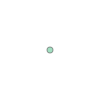

In [141]:
bugloc.newgeom[0]

In [124]:
from geopandas import GeoSeries

In [49]:
testhood.intersects(bugs.newgeom[0])

False

In [46]:
bugs.newgeom[0] in neighbourhoods.newgeom[0]

TypeError: argument of type 'Polygon' is not iterable

In [14]:
import shapely.geometry
def transform_geometry_json_to_object(the_geom, 
                                      geom_type = "type",
                                      coord_varname = 'coordinates'
                                     ):
    result = []
    for datum in the_geom:
        geom_type    = datum[geom_type]
#         coord_values = datum[coord_varname]
#         if geom_type == 'MultiPolygon':
#             geom_type = 'Polygon'
#         geomfxn = getattr(shapely.geometry, geom_type)
#         output = geomfxn(coord_values)
#         result.append(output)


transform_geometry_json_to_object(bikes.the_geom)

KeyError: 'Point'

## mosquitoes

In [ ]:
client = Socrata("data.winnipeg.ca", None)
bugs = client.get("du7c-8488", limit=2000)

In [ ]:
bugsdf = pd.DataFrame(bugs)
bugsdf.T
idvars = ['count_date', 'trap_days']

In [ ]:
idvars = ['count_date', 'trap_days']
location_only = [x for x in bugsdf.columns if "average" not in x]
location_only = [x for x in location_only if x not in idvars]
len(location_only)

In [ ]:
import pandas as pd
from sodapy import Socrata

In [ ]:
client = Socrata("data.winnipeg.ca", None)
results = client.get("t2d2-j4v9", limit=2000)


In [ ]:
df = pd.DataFrame.from_records(results)

In [ ]:
df.columns

In [ ]:
df.head().T

In [ ]:
!ls 

hello world

In [ ]:
bugcleaned = pd.melt(bugsdf[location_only + idvars], id_vars = idvars, var_name = 'location', value_name = 'bugcount')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
parkbikedata = "9t9k-ya8b"
parkbikedf = client.get("9t9k-ya8b", limit=2000)

In [ ]:
pd.DataFrame(parkbikedf).T

In [ ]:
client = Socrata("data.winnipeg.ca", None)

In [ ]:
bikeurl = "https://data.winnipeg.ca/resource/9t9k-ya8b.json"

In [ ]:
client = Socrata("data.winnipeg.ca", None)
bikes = client.get("9t9k-ya8b", limit=2000)


neighbourhood map

https://data.winnipeg.ca/resource/xaux-29zr.json

In [ ]:
import shapely.geometry
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
neighbourhoods = client.get("xaux-29zr", limit=2000)
neighbourhoods = GeoDataFrame(neighbourhoods)
newgeom = [shapely.geometry.Polygon(x['coordinates'][0][0]) for x in neighbourhoods.the_geom]
neighbourhoods['newgeom'] = newgeom
neighbourhoods.head()


In [ ]:
shapely.geometry.MultiPolygon

In [ ]:
import shapely.geometry
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
neighbourhoods = client.get("xaux-29zr", limit=2000)

neighbourhoods = GeoDataFrame(neighbourhoods)
newgeom = [shapely.geometry.Polygon(x['coordinates'][0][0]) for x in neighbourhoods.the_geom]
neighbourhoods['newgeom'] = newgeom
neighbourhoods.head()
#neighbourhoods = neighbourhoods.set_geometry('newgeom')

In [ ]:
getattr(shapely.geometry, x['type'])

In [ ]:
import shapely.geometry
example = [x['coordinates'] for x in neighbourhoods.the_geom][0]

In [ ]:
newgeom = [Polygon(x['coordinates'][0][0]) for x in neighbourhoods.the_geom]

In [ ]:
neighbourhoods['newgeom'] = newgeom
neighbourhoods = neighbourhoods.set_geometry('newgeom')

In [ ]:
neighbourhoods.plot()

In [ ]:
neighbourhoods

In [ ]:
neighbourhoods.the_geom[0].keys()

In [ ]:
neighbourhoods.the_geom[0]['type']

In [ ]:
example = neighbourhoods.the_geom[0]['coordinates']

In [ ]:
example[0][0]

In [ ]:
from shapely.geometry import Polygon
Polygon(example[0][0])

In [ ]:
from shapely.geometry import MultiPolygon
MultiPolygon(example)

In [ ]:
set(new_geom)

In [ ]:
gdf.DataFrame(neighbourhoods)

In [ ]:
import shapely.geometry

In [ ]:
neipd.DataFrame(neighbourhoods)

In [ ]:
bikes_df = pd.DataFrame(bikes)
bikes_df.head()

In [ ]:
testcoord = bikes_df.the_geom[0]
testcoord

In [ ]:
import ipyleaflet

In [ ]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

In [ ]:
from ipyleaflet import Map

In [ ]:
Map(center = testcoord['coordinates'])

In [ ]:
# for x in bugcleaned.location.unique():
#     print(x)

https://docs.google.com/document/d/1xWBXAFSwtUGgZ3hQmzXE7ODnufQEWkji26vnsqfZzZ0/

http://winnipeg.ca/publicworks/insectcontrol/mosquitoes/nuisanceschedule.stm


In [ ]:
client = Socrata("data.winnipeg.ca", None)
mapdata = "tug6-p73s"
mapdata = client.get("tug6-p73s", limit=2000)
mapdata

North_east_1:  49.951867, -97.059306
North_east_2: 49.933941, -97.096341
North_east_3: 49.924809, -97.056330
North_east_4: 49.906175, -97.094797
North_east_5: 49.892358, -97.022426
North_east_6: 49.918257, -97.043848
North_east_7: 49.904900, -96.981602
North_west_1: 49.890104, -97.308464
North_west_2: 49.882624, -97.238131
North_west_3: 49.888943, -97.193254
North_west_4: 49.920877, -97.202540
North_west_5: 49.931627, -97.170450
North_west_6: 49.975104, -97.147863
North_west_7: 49.948876, -97.126311
Rural_aa: 49.981128, -97.244987
Rural_bb: 49.999793, -97.194880
Rural_cc: 49.991068, -97.089770
Rural_dd: 49.990523, -97.013920
Rural_ee: 49.852485, -96.986202
Rural_ff: 49.800355, -97.073122
Rural_gg: 49.782835, -97.339871
Rural_hh: 49.854707, -97.338403 
Rural_ii: 49.890188, -97.341707
South_east_1: 49.5242.6, 97.07156
South_east_2: 49.856801, -97.109705
south_east_3:49.859405, -97.066774
South_east_4: 49.824369, -97.133797
South_east_5: 49.829048, -97.098352
South_east_6: 49.827414, -97.060787
South_east_7: 49.806356, -97.100467
South_west_1: 49.832983, -97.332547
South_west_2: 49.852445, -97.275173
South_west_3: 49.868974, -97.243095
South_west_4: 49.868834, -97.184476
South_west_5: 49.818122, -97.165982
South_west_6: 49.805538, -97.138229
South_west_7: 49.827168, -97.170704


In [ ]:
import geopandas

In [ ]:
from geopandas import GeoDataFrame

In [ ]:
from shapely.geometry import Point

In [ ]:
mypoint = testcoord['coordinates']

In [ ]:
GeoDataFrame() 

In [ ]:
from shapely.geometry import Point

In [ ]:
geotypes = [x['type'] for x in bikes_df.the_geom]

In [ ]:
set(geotypes)

In [ ]:
Point()

In [ ]:
newgeom = [Point(x['coordinates']) for x in bikes_df.the_geom]
bikes_df['newgeom'] = newgeom

In [ ]:
gdf = bikes_df
gdf = gdf.set_geometry('newgeom')

In [ ]:
gdf.head()

In [ ]:
gdf.plot()

In [ ]:
gdf.set_geometry('newgeom')

In [ ]:
bikes_df

In [ ]:
bikes_df

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.GeoDataFrame(bikes)

In [ ]:
gdf.set_geometry('the_geom')